In [ ]:
!kaggle datasets download -d nicolaasregnier/pinotnoirgrapes

Dataset URL: https://www.kaggle.com/datasets/nicolaasregnier/pinotnoirgrapes
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
100% 1.58G/1.58G [00:17<00:00, 34.7MB/s]
100% 1.58G/1.58G [00:17<00:00, 98.0MB/s]


In [ ]:
# Unzip the dataset
import zipfile
with zipfile.ZipFile('pinotnoirgrapes.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset_directory')

In [ ]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.7/877.7 kB 14.1 MB/s eta 0:00:00


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 60.7MB/s]



image 1/1 /content/dataset_directory/Grapes/Grapes/PinotNoir/test/images/IMG_0243_1.jpg: 448x640 (no detections), 274.2ms
Speed: 45.9ms preprocess, 274.2ms inference, 179.4ms postprocess per image at shape (1, 3, 448, 640)


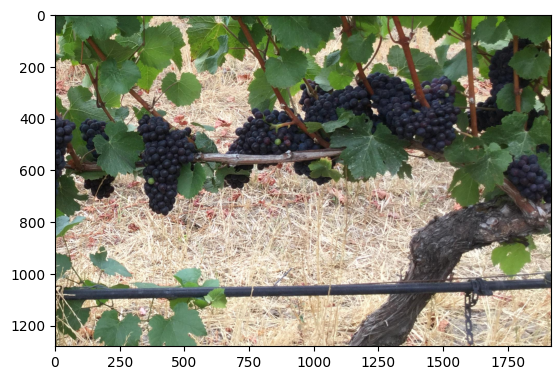

In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO('yolov8n.pt')

# Run inference on an image
results = model('/content/dataset_directory/Grapes/Grapes/PinotNoir/test/images/IMG_0243_1.jpg')  # results list

import cv2
# Observe results
img = results[0].plot()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
model = YOLO('/content/yolo11n.pt')  # Load the pretrained YOLOv8n model

# Train the model on your dataset
model.train(data='/content/dataset_directory/data.yaml', epochs=50, imgsz=640, batch=8)

Ultralytics 8.3.24 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolo11n.pt, data=/content/dataset_directory/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

train: Scanning /content/dataset_directory/Grapes/Grapes/PinotNoir/train/labels.cache... 76 images, 0 backgrounds, 0 corrupt: 100%|██████████| 76/76 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset_directory/Grapes/Grapes/PinotNoir/val/labels.cache... 9 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.41G      1.876      3.249      1.734         44        640: 100%|██████████| 10/10 [00:07<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all          9        101     0.0315      0.842      0.199     0.0986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.33G      1.533      2.697      1.335         32        640: 100%|██████████| 10/10 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.56it/s]


                   all          9        101     0.0341      0.911      0.535      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.37G      1.552      2.264      1.339         42        640: 100%|██████████| 10/10 [00:01<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.44it/s]

                   all          9        101     0.0348      0.931      0.544      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.31G      1.617      1.918      1.359         69        640: 100%|██████████| 10/10 [00:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]

                   all          9        101      0.917      0.328      0.542      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.34G      1.547      1.682      1.302         77        640: 100%|██████████| 10/10 [00:02<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


                   all          9        101      0.835      0.402       0.56      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.35G      1.465      1.506      1.316         79        640: 100%|██████████| 10/10 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all          9        101      0.912      0.386      0.631      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.32G      1.416      1.458      1.281         43        640: 100%|██████████| 10/10 [00:01<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.24it/s]

                   all          9        101      0.846      0.376      0.582      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.35G       1.35      1.383      1.239         55        640: 100%|██████████| 10/10 [00:01<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]

                   all          9        101      0.794      0.495      0.607      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.33G      1.436      1.445      1.304         50        640: 100%|██████████| 10/10 [00:01<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]

                   all          9        101      0.652      0.465      0.499      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.33G      1.446      1.456      1.328         34        640: 100%|██████████| 10/10 [00:01<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all          9        101      0.784      0.495      0.638      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.33G      1.337      1.365      1.258         75        640: 100%|██████████| 10/10 [00:02<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all          9        101      0.702       0.63      0.683      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.33G      1.323      1.346      1.255         61        640: 100%|██████████| 10/10 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all          9        101      0.802      0.594      0.676      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.33G      1.342      1.401      1.283         64        640: 100%|██████████| 10/10 [00:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.51it/s]

                   all          9        101      0.682      0.624       0.65      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.33G       1.35      1.355      1.259        106        640: 100%|██████████| 10/10 [00:01<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]

                   all          9        101      0.837      0.604      0.693       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.37G      1.308      1.304       1.23         83        640: 100%|██████████| 10/10 [00:01<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]

                   all          9        101      0.936      0.578      0.722      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.35G      1.307      1.308      1.243         56        640: 100%|██████████| 10/10 [00:01<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all          9        101      0.883        0.6       0.75      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.37G      1.319      1.282      1.233         66        640: 100%|██████████| 10/10 [00:03<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all          9        101      0.802      0.663      0.789      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.32G      1.291      1.243      1.206         48        640: 100%|██████████| 10/10 [00:03<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]

                   all          9        101      0.749      0.723      0.782      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.34G      1.309      1.248      1.207         56        640: 100%|██████████| 10/10 [00:01<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]

                   all          9        101      0.772      0.705      0.787      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.33G      1.187      1.212      1.181         45        640: 100%|██████████| 10/10 [00:01<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.30it/s]

                   all          9        101      0.805      0.703      0.803      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.36G      1.216      1.213      1.179         47        640: 100%|██████████| 10/10 [00:01<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]


                   all          9        101      0.767      0.723      0.816      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.32G      1.275       1.24      1.212         58        640: 100%|██████████| 10/10 [00:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all          9        101      0.802      0.723      0.815      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.31G      1.222      1.194      1.199         67        640: 100%|██████████| 10/10 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all          9        101      0.747      0.743      0.816      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.33G      1.155       1.15      1.158         78        640: 100%|██████████| 10/10 [00:02<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.37it/s]

                   all          9        101      0.783      0.743      0.822      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.33G       1.26      1.146      1.188         73        640: 100%|██████████| 10/10 [00:01<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.17it/s]

                   all          9        101      0.824      0.723      0.833      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.32G      1.229      1.131      1.189         51        640: 100%|██████████| 10/10 [00:01<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all          9        101      0.807      0.705       0.81      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.33G      1.225      1.093      1.164         47        640: 100%|██████████| 10/10 [00:01<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]

                   all          9        101       0.82      0.676      0.791      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.33G      1.233      1.141      1.174         51        640: 100%|██████████| 10/10 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


                   all          9        101      0.838      0.693      0.794      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.38G      1.183      1.093      1.161         40        640: 100%|██████████| 10/10 [00:04<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all          9        101      0.823      0.663      0.805      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.35G      1.165      1.039      1.144         63        640: 100%|██████████| 10/10 [00:01<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.59it/s]

                   all          9        101      0.795      0.731      0.803      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.33G      1.239      1.099      1.178         79        640: 100%|██████████| 10/10 [00:01<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]

                   all          9        101      0.821      0.762      0.836      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.33G      1.138      1.065      1.139         56        640: 100%|██████████| 10/10 [00:01<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.13it/s]

                   all          9        101      0.835      0.743      0.848      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.35G      1.154      1.062      1.157         38        640: 100%|██████████| 10/10 [00:02<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all          9        101      0.853      0.746      0.851      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.34G      1.134      1.057      1.142         37        640: 100%|██████████| 10/10 [00:03<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]

                   all          9        101      0.887      0.733      0.869      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.36G      1.096     0.9865      1.116         47        640: 100%|██████████| 10/10 [00:01<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all          9        101      0.858      0.723      0.861      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.35G      1.111     0.9974      1.117         53        640: 100%|██████████| 10/10 [00:01<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.32it/s]

                   all          9        101      0.769      0.812      0.872      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.31G      1.126      0.965      1.115         78        640: 100%|██████████| 10/10 [00:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]

                   all          9        101      0.759      0.832      0.881      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.32G      1.103     0.9777      1.126         52        640: 100%|██████████| 10/10 [00:01<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.08it/s]

                   all          9        101      0.916      0.743      0.868      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.35G      1.038     0.9379      1.082         65        640: 100%|██████████| 10/10 [00:02<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all          9        101      0.866      0.792      0.859      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.35G      1.046     0.9343      1.088         62        640: 100%|██████████| 10/10 [00:02<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]

                   all          9        101      0.838      0.767      0.856      0.607


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.36G      1.012      1.056      1.075         36        640: 100%|██████████| 10/10 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]

                   all          9        101      0.818      0.799      0.864      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.28G     0.9877      1.057       1.06         48        640: 100%|██████████| 10/10 [00:01<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all          9        101       0.85      0.703      0.842      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.29G      1.004      1.015      1.077         34        640: 100%|██████████| 10/10 [00:01<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.96it/s]

                   all          9        101      0.873      0.703      0.844      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.29G     0.9813     0.9666      1.052         36        640: 100%|██████████| 10/10 [00:02<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all          9        101       0.88      0.693       0.85      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.29G      0.951     0.9346      1.053         21        640: 100%|██████████| 10/10 [00:03<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]

                   all          9        101      0.863      0.713      0.857      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.28G     0.9394     0.9274      1.039         38        640: 100%|██████████| 10/10 [00:01<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.08it/s]

                   all          9        101      0.821      0.762      0.852       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.29G     0.9558     0.9245      1.037         29        640: 100%|██████████| 10/10 [00:01<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.65it/s]

                   all          9        101      0.808      0.762       0.85      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.29G     0.9311     0.8908       1.04         31        640: 100%|██████████| 10/10 [00:01<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.21it/s]

                   all          9        101      0.776      0.755      0.851      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.28G     0.9571     0.8979       1.04         45        640: 100%|██████████| 10/10 [00:01<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]

                   all          9        101      0.772      0.762      0.848      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.28G     0.9559     0.8994      1.039         32        640: 100%|██████████| 10/10 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all          9        101      0.833      0.723      0.846      0.627



50 epochs completed in 0.058 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.24 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]


                   all          9        101       0.75      0.822      0.873      0.626
Speed: 0.2ms preprocess, 4.2ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78c83ccf3880>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
results = model.val(data='/content/dataset_directory/data.yaml')

# Print results
print(results)

Ultralytics 8.3.24 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/dataset_directory/Grapes/Grapes/PinotNoir/val/labels.cache... 9 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]


                   all          9        101      0.759      0.832      0.881      0.626
Speed: 0.7ms preprocess, 39.9ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train32
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78c83c9ec550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.0


image 1/1 /content/dataset_directory/Grapes/Grapes/PinotNoir/test/images/IMG_0243_1.jpg: 448x640 21 grapes, 11.1ms
Speed: 3.2ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


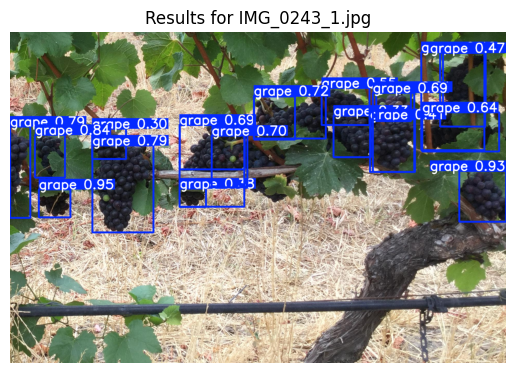


image 1/1 /content/dataset_directory/Grapes/Grapes/PinotNoir/test/images/IMG_0211_0.jpg: 640x640 8 grapes, 15.6ms
Speed: 3.3ms preprocess, 15.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


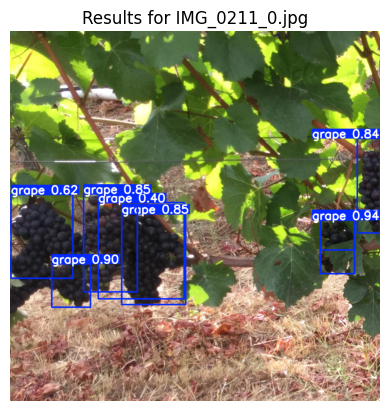


image 1/1 /content/dataset_directory/Grapes/Grapes/PinotNoir/test/images/IMG_0235_0.jpg: 640x640 13 grapes, 12.3ms
Speed: 4.9ms preprocess, 12.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


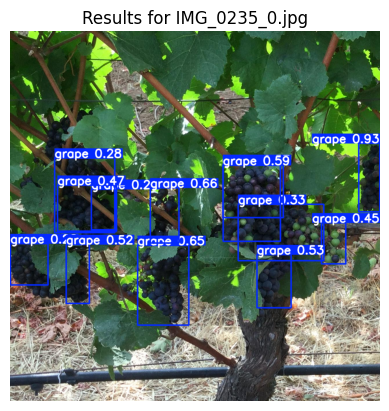


image 1/1 /content/dataset_directory/Grapes/Grapes/PinotNoir/test/images/IMG_0237_1.jpg: 512x640 10 grapes, 14.8ms
Speed: 4.1ms preprocess, 14.8ms inference, 1.8ms postprocess per image at shape (1, 3, 512, 640)


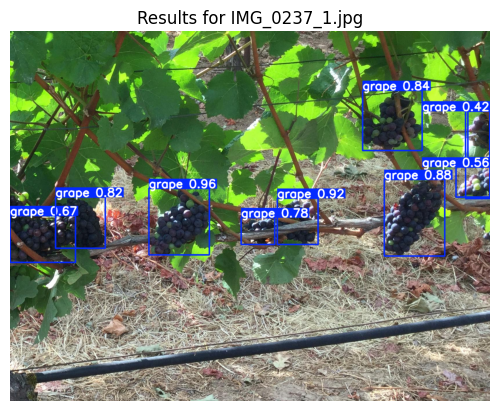


image 1/1 /content/dataset_directory/Grapes/Grapes/PinotNoir/test/images/IMG_0238_1.jpg: 448x640 8 grapes, 14.0ms
Speed: 3.1ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


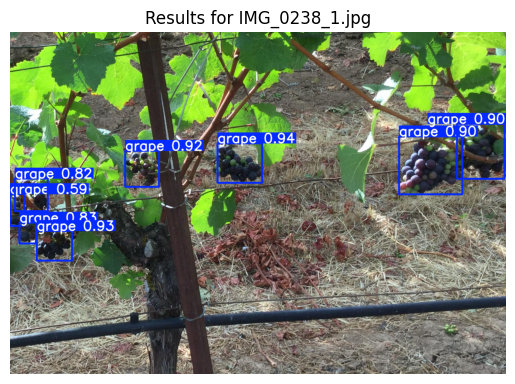


image 1/1 /content/dataset_directory/Grapes/Grapes/PinotNoir/test/images/IMG_0241_0.jpg: 640x640 13 grapes, 20.7ms
Speed: 8.4ms preprocess, 20.7ms inference, 6.9ms postprocess per image at shape (1, 3, 640, 640)


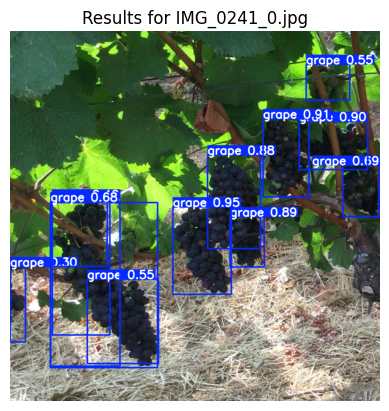


image 1/1 /content/dataset_directory/Grapes/Grapes/PinotNoir/test/images/IMG_0203_0.jpg: 640x640 13 grapes, 22.6ms
Speed: 8.3ms preprocess, 22.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


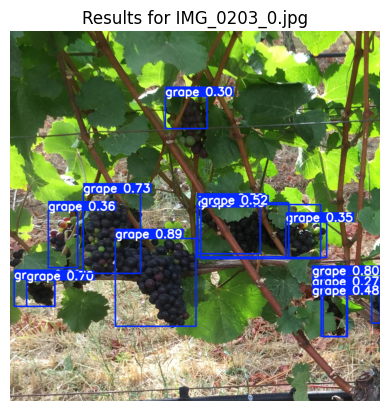


image 1/1 /content/dataset_directory/Grapes/Grapes/PinotNoir/test/images/IMG_0240_0.jpg: 640x640 9 grapes, 17.5ms
Speed: 3.4ms preprocess, 17.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


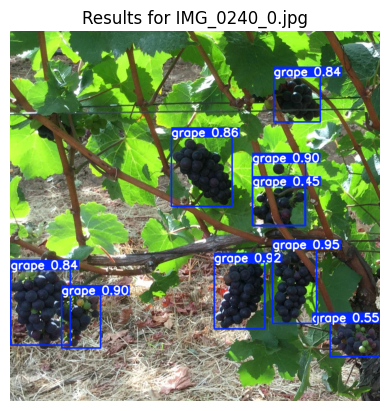


image 1/1 /content/dataset_directory/Grapes/Grapes/PinotNoir/test/images/IMG_0230_1.jpg: 480x640 14 grapes, 16.8ms
Speed: 3.9ms preprocess, 16.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


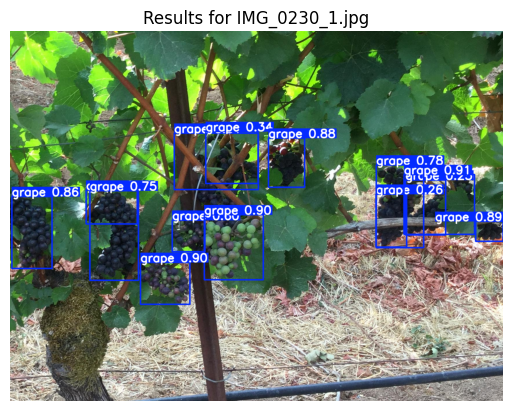


image 1/1 /content/dataset_directory/Grapes/Grapes/PinotNoir/test/images/IMG_0209_0.jpg: 640x640 11 grapes, 18.0ms
Speed: 5.0ms preprocess, 18.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


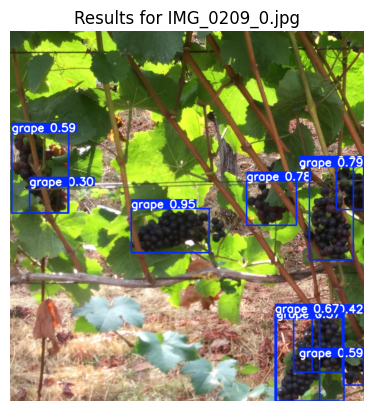

In [ ]:
# Define the test images directory
test_images_dir = '/content/dataset_directory/Grapes/Grapes/PinotNoir/test/images'  # Path to your test images directory

# Loop through all images in the test directory
for img_file in os.listdir(test_images_dir):
    if img_file.endswith(('.jpg', '.png')):  # Check for valid image file types
        image_path = os.path.join(test_images_dir, img_file)
        results = model(image_path, conf = 0.25)  # Run inference

        # Plot the results
        img = results[0].plot()  # Get the plot image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.imshow(img)
        plt.title(f'Results for {img_file}')
        plt.axis('off')  # Hide axes
        plt.show()  # Display the image


In [ ]:
results = model.val(data='/content/dataset_directory/data.yaml', conf=0.25, iou=0.5)

# Print mAP results
mAP_0_5 = results.box.map50  # Assuming map50 attribute holds the mAP@0.5 value
mAP_0_5_0_95 = results.box.map   # Assuming map attribute holds the mAP@0.5:0.95 value

# Print mAP results
print("Mean Average Precision (mAP):")
print(f"mAP@0.5: {mAP_0_5:.4f}")
print(f"mAP@0.5:0.95: {mAP_0_5_0_95:.4f}")

Ultralytics 8.3.24 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/dataset_directory/Grapes/Grapes/PinotNoir/val/labels.cache... 9 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]


                   all          9        101      0.822      0.832      0.873      0.653
Speed: 0.3ms preprocess, 15.5ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train33
Mean Average Precision (mAP):
mAP@0.5: 0.8730
mAP@0.5:0.95: 0.6533


In [ ]:
# Check if recall is directly available in the results object
recall = results.box.mr

if recall is not None:
    print(f"Recall: {recall:.4f}")
else:
    print("Recall metric not found in results object.")


Recall: 0.8317


In [ ]:
from IPython.display import display, Video

# Assuming your video is in this location
video_path = '/content/dataset_directory/Grapes/Grapes/videos/grape_video_pan_in_out.mp4'
results = model(video_path, save=True)

# Assuming the saved video is named 'predict.mp4' by default:
predicted_video_path = os.path.join(results[0].save_dir, 'predict.mp4') # Get the saved video path


# Display the video in Jupyter Notebook
display(Video(predicted_video_path, embed=True, width=640, height=480))



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/433) /content/dataset_directory/Grapes/Grapes/videos/grape_video_pan_in_out.mp4: 384x640 (no detections), 19.3ms
video 1/1 (frame 2/433) /content/dataset_directory/Grapes/Grapes/videos/grape_video_pan_in_out.mp4: 384x640 (no detections), 9.0ms
video 1/1 (frame 3/433) /content/dataset_directory/Grapes/Grapes/videos/grape_video_pan_in_out.mp4: 384x640 (no detections), 14.7ms
video 1/1 (frame 4/433) /content/dataset_directory/Grapes/Gra